In [1]:
import pandas as pd 
import pmdarima as pm 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [2]:
data = pd.read_csv('../ts_data/monthly-beer-production-in-austr.csv', parse_dates=['Month'], index_col=['Month'])
data 

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


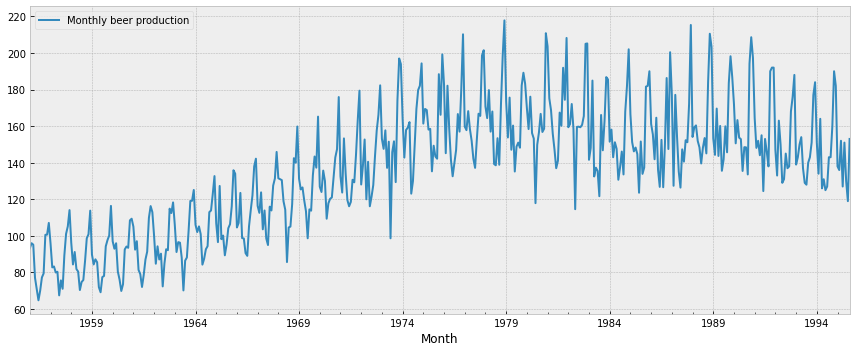

In [3]:
data.plot(figsize=(12,5))
plt.tight_layout()
plt.show()

In [4]:
train, test = pm.model_selection.train_test_split(data, test_size=0.2)
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

Train: (380, 1)
Test: (96, 1)


## Cross-validation predictions

In [5]:
model = pm.auto_arima(train, m=12, seasonal=True, trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3309.611, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3109.448, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3127.029, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3307.628, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3285.652, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3091.028, Time=0.73 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=3177.040, Time=0.48 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2920.876, Time=1.88 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2951.170, Time=0.74 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=2862.244, Time=2.45 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : 

In [6]:
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  380
Model:             SARIMAX(4, 1, 4)x(1, 0, [1, 2], 12)   Log Likelihood               -1377.354
Date:                                 Mon, 21 Mar 2022   AIC                           2780.708
Time:                                         18:02:44   BIC                           2831.896
Sample:                                              0   HQIC                          2801.022
                                                 - 380                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.009      0.115      0.909      -0.016       0

In [7]:
cv = pm.model_selection.SlidingWindowForecastCV(window_size=20, step=10, h=10)
cv

SlidingWindowForecastCV(h=10, step=10, window_size=20)

In [8]:
pred = pm.model_selection.cross_val_predict(model, test, cv=cv, verbose=2, averaging='mean')

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................


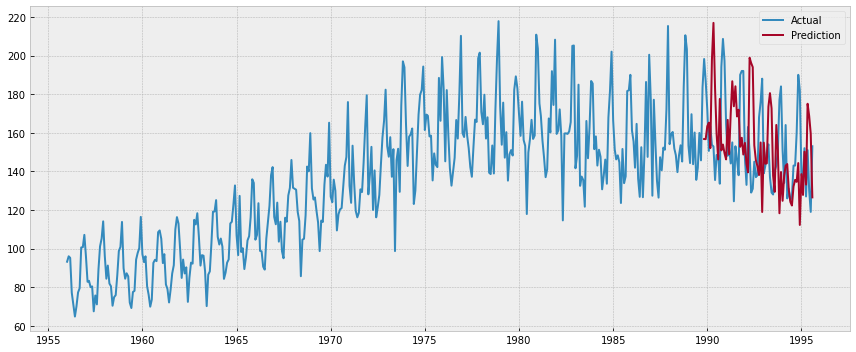

In [9]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(data, label='Actual')
ax.plot(data.index[-len(pred):], pred, label='Prediction')
ax.legend()

plt.tight_layout()
plt.show()

## Cross-validation scores

In [10]:
cv = pm.model_selection.SlidingWindowForecastCV(window_size=200, step=20, h=10)

In [11]:
train_scores = pm.model_selection.cross_val_score(model, train, scoring='smape', cv=cv, verbose=2)

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................


In [12]:
train_scores

array([6.83248151, 6.63671315, 8.12758955, 2.21512557, 5.07115364,
       6.67769329, 9.34819291, 4.72995232, 6.19503161])

In [13]:
print(f"Avg Scores: {train_scores.mean()}")

Avg Scores: 6.203770393045294
